<a href="https://colab.research.google.com/github/SubhadraBhagat/MachineLearning/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Status Prediction using support vector machine

This project is design to predict, whether a particular customer is eligble for the loan or not on the basis of  customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others, datase are taken from kaggle https://www.kaggle.com/datasets/ninzaami/loan-predication, here each individual features are visualized against the loan status to get more insight about the eligibity criteria and to automate loan system. In order to classify the loan approval and rejection Support vector machine is used, which is a big margin classifier. After training the data using support vector machine model, it is found that the model is performing well on both the training and test set with 80% and 85% of accuracy respectively.

## Importing the libraries

In [ ]:
import numpy as np                                        #numpy library useful for making numpy array
import pandas as pd                                       #to structure data in pandas dataframe
import matplotlib.pyplot as plt                           #useful for making plots and viusalization
import seaborn as sns                                     #useful for making plots and viusalization

# Importing Dataset

In [ ]:
dataset = pd.read_csv('loanstatus.csv')                   #importing data set in pandas data frame

In [ ]:
dataset.shape                                             #size of the dataset

(614, 13)

In [ ]:
dataset.head()                                            #first 5 rows of data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
dataset.tail()                                           #last 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
dataset.info()   #objects needs to encoded 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
dataset.isnull().sum()   #checking missing data

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#statistical measure
dataset.describe()     #25% people having income less than 2877 and so on

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#when we have categorical data then can not use imputation, drop is preferable
#imputation is for numerical data
#dropping missing data set

dataset = dataset.dropna()

In [ ]:
dataset.isnull().sum()   #checking missing data

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
dataset.shape    #reduced to 480 from 614

(480, 13)

In [ ]:
#label encoding
#encoding "Loan_Status" column
dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace = True)  #inplace - replacement parameter

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
#dependent column value
dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
#replacing 3+ to 4 because +- are not good in practice
dataset.replace({'Dependents':{'3+':4}}, inplace = True)  #inplace - replacement parameter

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
dataset['Dependents'].value_counts()   #replaced with 4

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [ ]:
dataset['Property_Area'].value_counts()   


Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

## Data Visualization

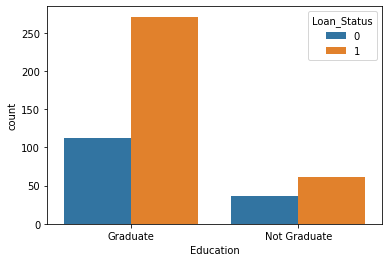

In [ ]:
#education and loan status
sns.countplot(x = 'Education' , hue = 'Loan_Status', data = dataset)  #loan approved 1 (more for graduated people)
                                                                      #loan rejected 0 (less for not graduated)

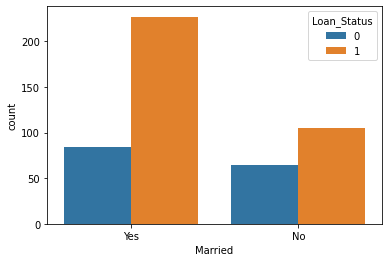

In [ ]:
#marital status and Loanstatus
sns.countplot(x = 'Married' , hue = 'Loan_Status', data = dataset) #loan approved 1 (more for married people)
                                                                   #loan rejected 0 (less for bachelors)

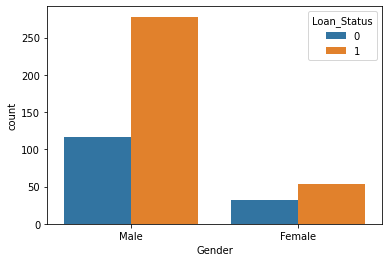

In [ ]:
#gender and Loanstatus
sns.countplot(x = 'Gender' , hue = 'Loan_Status', data = dataset) #loan approved 1 (more for male)
                                                                  #loan rejected 0 (less for females :(     

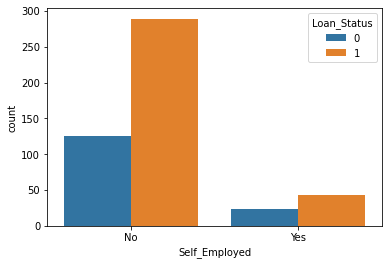

In [ ]:
#self_employed and Loanstatus
sns.countplot(x = 'Self_Employed' , hue = 'Loan_Status', data = dataset) #loan approved 1 (more for self employed)
                                                                         #loan rejected 0 (less for not self employed) 

## Splitting approved and rejection transaction

In [ ]:
# approved = dataset[dataset.Loan_Status == 1] #No need less amount of data data are not highly unbalanced
# rejection = dataset[dataset.Loan_Status == 0]

In [ ]:
# print(approved.shape)
# print(rejection.shape)

(332, 13)
(148, 13)


## Encoding categorical features

In [ ]:
# # convert categorical columns to numerical values
# dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
#                       'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'] 

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(dataset[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=dataset.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = dataset.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)  #column wise concatenation

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


## Splitting feature matrix and output

In [ ]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)
print(y)

[[1 1 '1' ... 360.0 1.0 0]
 [1 1 '0' ... 360.0 1.0 2]
 [1 1 '0' ... 360.0 1.0 2]
 ...
 [1 1 '1' ... 360.0 1.0 2]
 [1 1 '2' ... 360.0 1.0 2]
 [0 0 '0' ... 360.0 0.0 1]]
[0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


## Training dataset using Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score                #metrics 

In [ ]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)

In [ ]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7916666666666666


In [ ]:
# accuracy score on training data
y_pred = classifier.predict(X_test)
test_data_accuray = accuracy_score(y_pred,y_test)

In [ ]:
print('Accuracy on test data : ', test_data_accuray) #our model is working good not overfitted or underfitted

Accuracy on test data :  0.8541666666666666


## Making confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
#y_pred = h(x), y_test = y, accuracy = h(x) - y

[[ 8  7]
 [ 0 33]]


0.8541666666666666